In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_theme(style="whitegrid")

In [31]:
sy = pd.read_csv('StableYolo_results_numgen50_popsize25_new.csv', header=None, index_col=0)
sy['model'] = 'Stable YOLO'
sy.drop(columns=2, inplace=True)
sy.columns = [1,2,'model']
sy

,1,2,model
0,,,
1,0.744167,27383.300780,Stable YOLO
2,0.855833,22764.111330,Stable YOLO
3,0.813333,23600.783200,Stable YOLO
4,0.828000,30347.857420,Stable YOLO
5,0.846364,19792.208980,Stable YOLO
6,0.767143,107854.046875,Stable YOLO
7,0.794545,33767.144531,Stable YOLO
8,0.845000,117978.757812,Stable YOLO
9,0.862727,110482.531250,Stable YOLO


In [58]:
# statistics

sy.describe()

,1,2
count,10.000000,10.000000
mean,0.820283,61495.033593
std,0.039988,45771.817993
min,0.744167,19792.208980
25%,0.799242,24546.412595
50%,0.836500,32057.500976
75%,0.846201,109825.410156
max,0.862727,120979.593750


In [32]:
gy = pd.read_csv('GreenYolo_results_numgen10_popsize25.csv', header=None, index_col=0)
gy['model'] = 'Green YOLO'
gy

,1,2,model
0,,,
1,0.710000,6328.475586,Green YOLO
2,0.764167,11551.518555,Green YOLO
3,0.590556,6884.140625,Green YOLO
4,0.506923,3995.268799,Green YOLO
5,0.683571,11829.330078,Green YOLO
6,0.656667,12278.750000,Green YOLO
7,0.643913,8934.455078,Green YOLO
8,0.732857,6060.795410,Green YOLO
9,0.693478,8794.366211,Green YOLO


In [59]:
# statistics

gy.describe()

,1,2
count,10.000000,10.000000
mean,0.668080,8425.586060
std,0.074314,2774.412035
min,0.506923,3995.268799
25%,0.647101,6467.391846
50%,0.688525,8196.563232
75%,0.707167,10897.252686
max,0.764167,12278.750000


In [33]:
data = pd.concat([sy, gy])

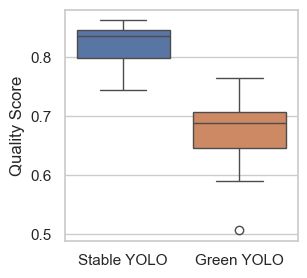

In [41]:
# image accuracy
fig, ax = plt.subplots(figsize=(3,3))
sns.boxplot(data=data, x='model', y=1, ax=ax, hue='model')
plt.ylabel('Quality Score')
plt.xlabel('')
plt.savefig('accuracy.pdf')

In [55]:
# statistically significance test for the image accuracy

stats.wilcoxon(sy[1].values, gy[1].values)

WilcoxonResult(statistic=0.0, pvalue=0.001953125)

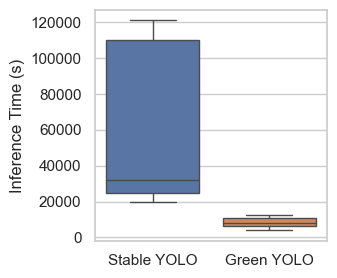

In [42]:
# inference time
fig, ax = plt.subplots(figsize=(3, 3))
sns.boxplot(data=data, x="model", y=2, ax=ax, hue="model")
plt.ylabel("Inference Time (s)")
plt.xlabel("")
plt.savefig("inference.pdf")

In [57]:
# statistically significance test for the inference time

stats.wilcoxon(sy[2].values, gy[2].values)

WilcoxonResult(statistic=0.0, pvalue=0.001953125)